## NOTEBOOK 11

In this notebook we will introduce ourselves to machine learing, in particular to artificial neural networks (NN) using the python library Tensorflow.

We will start by doing regression on noisy set of data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, activations 

### EXERCISE 11.1 

In this first exercise we will try to make regression on a set of data generated from a simple linear function adding Gaussian noise on them. The generating function is

$$
f(x)=2x+1
$$

In [23]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect


- **The dataset**

In [24]:
## Create training and validation set
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma_t = 0.5 # noise standard deviation, for the moment it is absent
sigma_v =0.5
y_train = np.random.normal(m * x_train + b, sigma_t) 
y_valid = np.random.normal(m * x_valid + b, sigma_v)


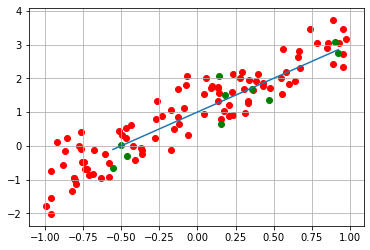

In [25]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_train, y_train, color='r')
plt.scatter(x_valid,y_valid,color='g')
plt.grid(True); plt.show()

- **The Neural Network**

Now that we have a training and a test/validation set, we can create the neral network to solve the regression problem. In this case, a sigle node is sufficient.

In particular, a single node without any activation function (the activation here can be considered the identity) since the model from which we are learning is linear and the output of a single neuron $j$ is 

$$
out_{j}= \sum_{i} w_{i}x_{i} - \theta_{j}
$$

where $w_{i}$ are the weight assigned to each input of the neuron and $\theta_{j}$ is the bias, or threshold, of the neuron, so, as can be seen, again a linear function.

When the dataset will be more complicated, it will be useful to introduce a non-linear activation function like $\sigma$.

In [26]:
# Create a single node NN

model = tf.keras.Sequential() ##Sequential is for simple feed-forward NN
model.add(layers.Dense(1, input_shape=(1,))) ## Dense is for a fully connected layer

                                            ## no activation function

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [27]:
# get a summary of our composed model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- **Training the network**

In [28]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
4/4 [==============================] - 0s 67ms/step - loss: 3.3543 - mse: 3.3543 - val_loss: 3.4980 - val_mse: 3.4980
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 3.1224 - mse: 3.1224 - val_loss: 3.1941 - val_mse: 3.1941
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 2.8911 - mse: 2.8911 - val_loss: 2.9524 - val_mse: 2.9524
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 2.7004 - mse: 2.7004 - val_loss: 2.6918 - val_mse: 2.6918
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 2.5045 - mse: 2.5045 - val_loss: 2.5411 - val_mse: 2.5411
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 2.3800 - mse: 2.3800 - val_loss: 2.4047 - val_mse: 2.4047
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 2.2669 - mse: 2.2669 - val_loss: 2.2478 - val_mse: 2.2478
Epoch 8/100
4/4 [==============================] - 0s 17ms/step - loss: 2.1406 - mse: 2.14

- **Evaluation of the model**

In [29]:
# return weights
model.get_weights()

[array([[1.9564574]], dtype=float32), array([1.067567], dtype=float32)]

In [30]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042

Test loss: 0.004156104288995266
Test accuracy: 0.004156104288995266


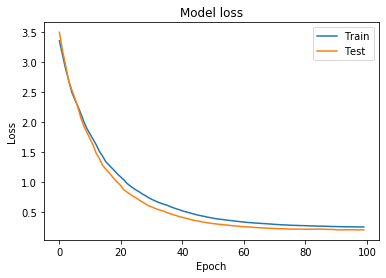

In [31]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In this case the model **can't** overfit: the only two parameters it can learn are the angular coefficient and the intercept of the straight line, so the best it does is creating a linear function, it will not "fit the noise".

So, as expected, the error decreases and then stabilizes at a fixed value. The final value of the error will depend on the strenght of the noise (without the noise it is expected to be 0).

If the strenght of the noise for the validation set is lower than the training set the final value of the test error will be smaller than the training error.

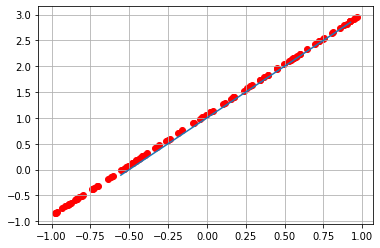

In [32]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### EXERCISE 11.2

Let's consider a less trivial example: regression on data generated from an higher-order polynomial function:
$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In [1]:
## Parameters to be learnt

a0=4
a1=-3
a2=-2
a3=3

- **Generate the dataset**

In [13]:
np.random.seed(0) ## the seed is re initialized in order to not have to run all the notebook everytime 
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a0+a1 * x_valid + a2*x_valid**2+a3*x_valid**3 # ideal (target) linear function

sigma_t = 0.1 # noise standard deviation, for the moment it is absent
sigma_v =0.1
y_train = np.random.normal(a0+a1 * x_train + a2*x_train**2+a3*x_train**3, sigma_t) 
y_valid = np.random.normal(a0+a1 * x_valid + a2*x_valid**2+a3*x_valid**3, sigma_v)


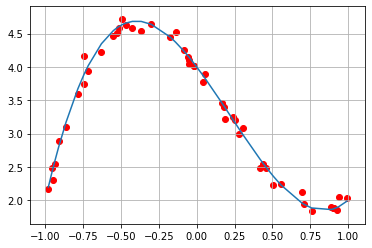

In [14]:
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

- **The neural network**

Every NN with 3 or more layers is capable to represent any continuous function (although we could have an exponential scaling of the number of neuron in the hidden layer), therefore a single hidden layer will be necessary to fit our target

In [23]:
model3 = tf.keras.Sequential()
model3.add(layers.Dense(16, input_shape=(1,), activation=activations.sigmoid))
model3.add(layers.Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [24]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


- **Train the model**

In [29]:
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Epoch 1/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.4858 - mse: 0.4858 - val_loss: 0.6274 - val_mse: 0.6274
Epoch 2/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.4846 - mse: 0.4846 - val_loss: 0.6337 - val_mse: 0.6337
Epoch 3/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.4834 - mse: 0.4834 - val_loss: 0.6181 - val_mse: 0.6181
Epoch 4/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.4812 - mse: 0.4812 - val_loss: 0.6135 - val_mse: 0.6135
Epoch 5/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.4793 - mse: 0.4793 - val_loss: 0.6017 - val_mse: 0.6017
Epoch 6/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.4789 - mse: 0.4789 - val_loss: 0.6007 - val_mse: 0.6007
Epoch 7/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.4775 - mse: 0.4775 - val_loss: 0.6175 - val_mse: 0.6175
Epoch 8/1000
32/32 [==============================] - 0s 9ms/step - loss:

32/32 [==============================] - 0s 5ms/step - loss: 0.3947 - mse: 0.3947 - val_loss: 0.5152 - val_mse: 0.5152
Epoch 63/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.3931 - mse: 0.3931 - val_loss: 0.5135 - val_mse: 0.5135
Epoch 64/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.3910 - mse: 0.3910 - val_loss: 0.5114 - val_mse: 0.5114
Epoch 65/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.5102 - val_mse: 0.5102
Epoch 66/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.3876 - mse: 0.3876 - val_loss: 0.5047 - val_mse: 0.5047
Epoch 67/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.3863 - mse: 0.3863 - val_loss: 0.5018 - val_mse: 0.5018
Epoch 68/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.3845 - mse: 0.3845 - val_loss: 0.4984 - val_mse: 0.4984
Epoch 69/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.383

32/32 [==============================] - 0s 10ms/step - loss: 0.3151 - mse: 0.3151 - val_loss: 0.4235 - val_mse: 0.4235
Epoch 124/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.3139 - mse: 0.3139 - val_loss: 0.4150 - val_mse: 0.4150
Epoch 125/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.3129 - mse: 0.3129 - val_loss: 0.4144 - val_mse: 0.4144
Epoch 126/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.3121 - mse: 0.3121 - val_loss: 0.4180 - val_mse: 0.4180
Epoch 127/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.3106 - mse: 0.3106 - val_loss: 0.4247 - val_mse: 0.4247
Epoch 128/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.3092 - mse: 0.3092 - val_loss: 0.4187 - val_mse: 0.4187
Epoch 129/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.3085 - mse: 0.3085 - val_loss: 0.4176 - val_mse: 0.4176
Epoch 130/1000
32/32 [==============================] - 0s 6ms/step - loss

32/32 [==============================] - 0s 10ms/step - loss: 0.2468 - mse: 0.2468 - val_loss: 0.3425 - val_mse: 0.3425
Epoch 185/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.2460 - mse: 0.2460 - val_loss: 0.3343 - val_mse: 0.3343
Epoch 186/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.2449 - mse: 0.2449 - val_loss: 0.3336 - val_mse: 0.3336
Epoch 187/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.2433 - mse: 0.2433 - val_loss: 0.3398 - val_mse: 0.3398
Epoch 188/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.2432 - mse: 0.2432 - val_loss: 0.3368 - val_mse: 0.3368
Epoch 189/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.2413 - mse: 0.2413 - val_loss: 0.3332 - val_mse: 0.3332
Epoch 190/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.2404 - mse: 0.2404 - val_loss: 0.3369 - val_mse: 0.3369
Epoch 191/1000
32/32 [==============================] - 0s 6ms/step - loss:

32/32 [==============================] - 0s 8ms/step - loss: 0.1838 - mse: 0.1838 - val_loss: 0.2502 - val_mse: 0.2502
Epoch 246/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.1833 - mse: 0.1833 - val_loss: 0.2567 - val_mse: 0.2567
Epoch 247/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.1824 - mse: 0.1824 - val_loss: 0.2513 - val_mse: 0.2513
Epoch 248/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.1812 - mse: 0.1812 - val_loss: 0.2526 - val_mse: 0.2526
Epoch 249/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.1804 - mse: 0.1804 - val_loss: 0.2527 - val_mse: 0.2527
Epoch 250/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.1799 - mse: 0.1799 - val_loss: 0.2498 - val_mse: 0.2498
Epoch 251/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.1789 - mse: 0.1789 - val_loss: 0.2479 - val_mse: 0.2479
Epoch 252/1000
32/32 [==============================] - 0s 10ms/step - loss: 

32/32 [==============================] - 0s 13ms/step - loss: 0.1400 - mse: 0.1400 - val_loss: 0.1936 - val_mse: 0.1936
Epoch 307/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.1398 - mse: 0.1398 - val_loss: 0.1972 - val_mse: 0.1972
Epoch 308/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.1389 - mse: 0.1389 - val_loss: 0.1938 - val_mse: 0.1938
Epoch 309/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.1383 - mse: 0.1383 - val_loss: 0.1940 - val_mse: 0.1940
Epoch 310/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.1381 - mse: 0.1381 - val_loss: 0.1909 - val_mse: 0.1909
Epoch 311/1000
32/32 [==============================] - 0s 12ms/step - loss: 0.1374 - mse: 0.1374 - val_loss: 0.1888 - val_mse: 0.1888
Epoch 312/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.1371 - mse: 0.1371 - val_loss: 0.1915 - val_mse: 0.1915
Epoch 313/1000
32/32 [==============================] - 0s 9ms/step - l

Epoch 367/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.1148 - mse: 0.1148 - val_loss: 0.1601 - val_mse: 0.1601
Epoch 368/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.1143 - mse: 0.1143 - val_loss: 0.1633 - val_mse: 0.1633
Epoch 369/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.1138 - mse: 0.1138 - val_loss: 0.1641 - val_mse: 0.1641
Epoch 370/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.1137 - mse: 0.1137 - val_loss: 0.1615 - val_mse: 0.1615
Epoch 371/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.1131 - mse: 0.1131 - val_loss: 0.1578 - val_mse: 0.1578
Epoch 372/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.1131 - mse: 0.1131 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 373/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.1126 - mse: 0.1126 - val_loss: 0.1591 - val_mse: 0.1591
Epoch 374/1000
32/32 [==============================] - 0s 6ms

32/32 [==============================] - 0s 6ms/step - loss: 0.1000 - mse: 0.1000 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 429/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0996 - mse: 0.0996 - val_loss: 0.1482 - val_mse: 0.1482
Epoch 430/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0996 - mse: 0.0996 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 431/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0993 - mse: 0.0993 - val_loss: 0.1384 - val_mse: 0.1384
Epoch 432/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 433/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1416 - val_mse: 0.1416
Epoch 434/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.1420 - val_mse: 0.1420
Epoch 435/1000
32/32 [==============================] - 0s 8ms/step - loss: 

32/32 [==============================] - 0s 7ms/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.1224 - val_mse: 0.1224
Epoch 490/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0900 - mse: 0.0900 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 491/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0900 - mse: 0.0900 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 492/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0897 - mse: 0.0897 - val_loss: 0.1249 - val_mse: 0.1249
Epoch 493/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.1248 - val_mse: 0.1248
Epoch 494/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0895 - mse: 0.0895 - val_loss: 0.1256 - val_mse: 0.1256
Epoch 495/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0895 - mse: 0.0895 - val_loss: 0.1224 - val_mse: 0.1224
Epoch 496/1000
32/32 [==============================] - 0s 8ms/step - loss: 0

32/32 [==============================] - 0s 10ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 551/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0824 - mse: 0.0824 - val_loss: 0.1112 - val_mse: 0.1112
Epoch 552/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0823 - mse: 0.0823 - val_loss: 0.1121 - val_mse: 0.1121
Epoch 553/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0819 - mse: 0.0819 - val_loss: 0.1144 - val_mse: 0.1144
Epoch 554/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.1130 - val_mse: 0.1130
Epoch 555/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0819 - mse: 0.0819 - val_loss: 0.1129 - val_mse: 0.1129
Epoch 556/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0818 - mse: 0.0818 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 557/1000
32/32 [==============================] - 0s 5ms/step - loss: 

32/32 [==============================] - 0s 9ms/step - loss: 0.0755 - mse: 0.0755 - val_loss: 0.1046 - val_mse: 0.1046
Epoch 612/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0752 - mse: 0.0752 - val_loss: 0.0975 - val_mse: 0.0975
Epoch 613/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0756 - mse: 0.0756 - val_loss: 0.1024 - val_mse: 0.1024
Epoch 614/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0752 - mse: 0.0752 - val_loss: 0.1000 - val_mse: 0.1000
Epoch 615/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0752 - mse: 0.0752 - val_loss: 0.1047 - val_mse: 0.1047
Epoch 616/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0752 - mse: 0.0752 - val_loss: 0.0986 - val_mse: 0.0986
Epoch 617/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0746 - mse: 0.0746 - val_loss: 0.1065 - val_mse: 0.1065
Epoch 618/1000
32/32 [==============================] - 0s 9ms/step - loss: 0

32/32 [==============================] - 0s 5ms/step - loss: 0.0693 - mse: 0.0693 - val_loss: 0.0925 - val_mse: 0.0925
Epoch 673/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0927 - val_mse: 0.0927
Epoch 674/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 675/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0923 - val_mse: 0.0923
Epoch 676/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0967 - val_mse: 0.0967
Epoch 677/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0690 - mse: 0.0690 - val_loss: 0.0918 - val_mse: 0.0918
Epoch 678/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0938 - val_mse: 0.0938
Epoch 679/1000
32/32 [==============================] - 0s 6ms/step - loss: 0

32/32 [==============================] - 0s 12ms/step - loss: 0.0634 - mse: 0.0634 - val_loss: 0.0848 - val_mse: 0.0848
Epoch 734/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0633 - mse: 0.0633 - val_loss: 0.0840 - val_mse: 0.0840
Epoch 735/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0869 - val_mse: 0.0869
Epoch 736/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0633 - mse: 0.0633 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 737/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0630 - mse: 0.0630 - val_loss: 0.0826 - val_mse: 0.0826
Epoch 738/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.0629 - mse: 0.0629 - val_loss: 0.0842 - val_mse: 0.0842
Epoch 739/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.0626 - mse: 0.0626 - val_loss: 0.0824 - val_mse: 0.0824
Epoch 740/1000
32/32 [==============================] - 0s 6ms/step - loss

32/32 [==============================] - 0s 8ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0786 - val_mse: 0.0786
Epoch 795/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0779 - val_mse: 0.0779
Epoch 796/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0741 - val_mse: 0.0741
Epoch 797/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0765 - val_mse: 0.0765
Epoch 798/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 799/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0759 - val_mse: 0.0759
Epoch 800/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0744 - val_mse: 0.0744
Epoch 801/1000
32/32 [==============================] - 0s 6ms/step - loss: 

32/32 [==============================] - 0s 8ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 856/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0532 - mse: 0.0532 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 857/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 858/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.0697 - val_mse: 0.0697
Epoch 859/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0528 - mse: 0.0528 - val_loss: 0.0686 - val_mse: 0.0686
Epoch 860/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0529 - mse: 0.0529 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 861/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0684 - val_mse: 0.0684
Epoch 862/1000
32/32 [==============================] - 0s 6ms/step - loss: 0

32/32 [==============================] - 0s 6ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 917/1000
32/32 [==============================] - 0s 8ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 918/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 919/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 920/1000
32/32 [==============================] - 0s 12ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 921/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0660 - val_mse: 0.0660
Epoch 922/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 923/1000
32/32 [==============================] - 0s 7ms/step - loss

32/32 [==============================] - 0s 7ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 978/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 979/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 980/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.0560 - val_mse: 0.0560
Epoch 981/1000
32/32 [==============================] - 0s 7ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 982/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0567 - val_mse: 0.0567
Epoch 983/1000
32/32 [==============================] - 0s 6ms/step - loss: 0.0444 - mse: 0.0444 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 984/1000
32/32 [==============================] - 0s 9ms/step - loss: 

- **Evaluation of the model**

In [30]:
#evaluate model with the exact curve
score = model3.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 13ms/step - loss: 0.0493 - mse: 0.0493

Test loss: 0.04930884391069412
Test accuracy: 0.04930884391069412


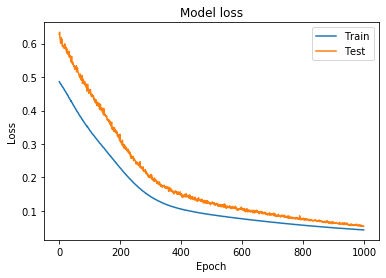

In [31]:
# look into training history
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

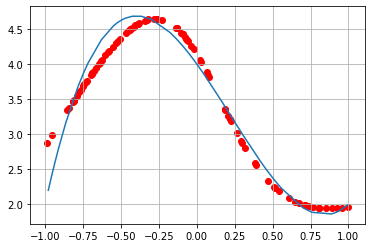

In [32]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

#### Considerations on single hidden layer NN

- with a single input and a single output, is useless to fit a polynomial function with a NN without activation function, since the function modeled will always be a straight line (due to the structure of the NN), so in this case I decided to incorporate a sigmoid activation function


- We can reach a good agreement, but it requires a long period of training. This can depend on several reasons: 1) too few neurons in the hidden layer, 2) inadequate activation function, 3) a single hidden layer can model the function, but is not the optimal solution, 4) unefficient optimizer

In the following we are going to explore ways to improve our results

In [47]:
models=[]

### Model with more neurons in the hidden layer

models.append(tf.keras.Sequential())

models[0].add(layers.Dense(50, input_shape=(1,), activation=activations.sigmoid))
models[0].add(layers.Dense(1))

models[0].compile(optimizer='sgd', loss='mse', metrics=['mse'])

### Model with different activation function
models.append(tf.keras.Sequential())

models[1].add(layers.Dense(16, input_shape=(1,), activation=activations.tanh))
models[1].add(layers.Dense(1))

models[1].compile(optimizer='sgd', loss='mse', metrics=['mse'])

## Deeper model (chosen in order to have a comparable numbers of parameters)

models.append(tf.keras.Sequential())

models[2].add(layers.Dense(5, input_shape=(1,), activation=activations.sigmoid))
models[2].add(layers.Dense(5,activation=activations.sigmoid))
models[2].add(layers.Dense(1))

models[2].compile(optimizer='sgd', loss='mse', metrics=['mse'])

## Different optimizer

models.append(tf.keras.Sequential())

models[3].add(layers.Dense(16, input_shape=(1,), activation=activations.sigmoid))
models[3].add(layers.Dense(1))

models[3].compile(optimizer='adam', loss='mse', metrics=['mse'])

In [48]:
for model in models:
    model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_18"
_____________

- **Train the models**

In [49]:
histories=[]
i=0

for model in models:
    print(i)
    histories.append(model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, 
          validation_data=(x_valid, y_valid)))
    i+=1

0
Epoch 1/100
32/32 [==============================] - 0s 12ms/step - loss: 1.7921 - mse: 1.7921 - val_loss: 1.0154 - val_mse: 1.0154
Epoch 2/100
32/32 [==============================] - 0s 11ms/step - loss: 1.0908 - mse: 1.0908 - val_loss: 0.9426 - val_mse: 0.9426
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 1.0491 - mse: 1.0491 - val_loss: 0.9043 - val_mse: 0.9043
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9997 - mse: 0.9997 - val_loss: 0.8698 - val_mse: 0.8698
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.9564 - mse: 0.9564 - val_loss: 0.8441 - val_mse: 0.8441
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.9186 - mse: 0.9186 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.8784 - mse: 0.8784 - val_loss: 0.7907 - val_mse: 0.7907
Epoch 8/100
32/32 [==============================] - 0s 10ms/step - loss: 0.845

32/32 [==============================] - 0s 6ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.6946 - val_mse: 0.6946
Epoch 64/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5596 - mse: 0.5596 - val_loss: 0.7146 - val_mse: 0.7146
Epoch 65/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5563 - mse: 0.5563 - val_loss: 0.7053 - val_mse: 0.7053
Epoch 66/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5573 - mse: 0.5573 - val_loss: 0.6958 - val_mse: 0.6958
Epoch 67/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5576 - mse: 0.5576 - val_loss: 0.6808 - val_mse: 0.6808
Epoch 68/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5569 - mse: 0.5569 - val_loss: 0.6991 - val_mse: 0.6991
Epoch 69/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5559 - mse: 0.5559 - val_loss: 0.6960 - val_mse: 0.6960
Epoch 70/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5568 - mse: 0

32/32 [==============================] - 0s 8ms/step - loss: 0.3152 - mse: 0.3152 - val_loss: 0.4068 - val_mse: 0.4068
Epoch 26/100
32/32 [==============================] - 0s 8ms/step - loss: 0.3064 - mse: 0.3064 - val_loss: 0.3899 - val_mse: 0.3899
Epoch 27/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2979 - mse: 0.2979 - val_loss: 0.3844 - val_mse: 0.3844
Epoch 28/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2897 - mse: 0.2897 - val_loss: 0.3668 - val_mse: 0.3668
Epoch 29/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2815 - mse: 0.2815 - val_loss: 0.3594 - val_mse: 0.3594
Epoch 30/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2725 - mse: 0.2725 - val_loss: 0.3556 - val_mse: 0.3556
Epoch 31/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2648 - mse: 0.2648 - val_loss: 0.3449 - val_mse: 0.3449
Epoch 32/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2571 - mse: 0

32/32 [==============================] - 0s 10ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0734 - val_mse: 0.0734
Epoch 88/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0728 - val_mse: 0.0728
Epoch 89/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0711 - val_mse: 0.0711
Epoch 90/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0722 - val_mse: 0.0722
Epoch 91/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 92/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0680 - val_mse: 0.0680
Epoch 93/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 94/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0480 - mse

32/32 [==============================] - 0s 10ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.6192 - val_mse: 0.6192
Epoch 50/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5619 - mse: 0.5619 - val_loss: 0.6126 - val_mse: 0.6126
Epoch 51/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5530 - mse: 0.5530 - val_loss: 0.6112 - val_mse: 0.6112
Epoch 52/100
32/32 [==============================] - 0s 8ms/step - loss: 0.5450 - mse: 0.5450 - val_loss: 0.6070 - val_mse: 0.6070
Epoch 53/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5365 - mse: 0.5365 - val_loss: 0.6089 - val_mse: 0.6089
Epoch 54/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5300 - mse: 0.5300 - val_loss: 0.6056 - val_mse: 0.6056
Epoch 55/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5231 - mse: 0.5231 - val_loss: 0.6055 - val_mse: 0.6055
Epoch 56/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5168 - mse: 

32/32 [==============================] - 0s 5ms/step - loss: 1.3273 - mse: 1.3273 - val_loss: 1.0707 - val_mse: 1.0707
Epoch 12/100
32/32 [==============================] - 0s 8ms/step - loss: 1.1416 - mse: 1.1416 - val_loss: 0.9365 - val_mse: 0.9365
Epoch 13/100
32/32 [==============================] - 0s 8ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 0.8420 - val_mse: 0.8420
Epoch 14/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9075 - mse: 0.9075 - val_loss: 0.7819 - val_mse: 0.7819
Epoch 15/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8380 - mse: 0.8380 - val_loss: 0.7386 - val_mse: 0.7386
Epoch 16/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7841 - mse: 0.7841 - val_loss: 0.7106 - val_mse: 0.7106
Epoch 17/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7457 - mse: 0.7457 - val_loss: 0.6911 - val_mse: 0.6911
Epoch 18/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7153 - mse: 0

32/32 [==============================] - 0s 6ms/step - loss: 0.4900 - mse: 0.4900 - val_loss: 0.6241 - val_mse: 0.6241
Epoch 74/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4890 - mse: 0.4890 - val_loss: 0.6221 - val_mse: 0.6221
Epoch 75/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4876 - mse: 0.4876 - val_loss: 0.6209 - val_mse: 0.6209
Epoch 76/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4868 - mse: 0.4868 - val_loss: 0.6213 - val_mse: 0.6213
Epoch 77/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4854 - mse: 0.4854 - val_loss: 0.6183 - val_mse: 0.6183
Epoch 78/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4840 - mse: 0.4840 - val_loss: 0.6185 - val_mse: 0.6185
Epoch 79/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4825 - mse: 0.4825 - val_loss: 0.6176 - val_mse: 0.6176
Epoch 80/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4815 - mse: 0

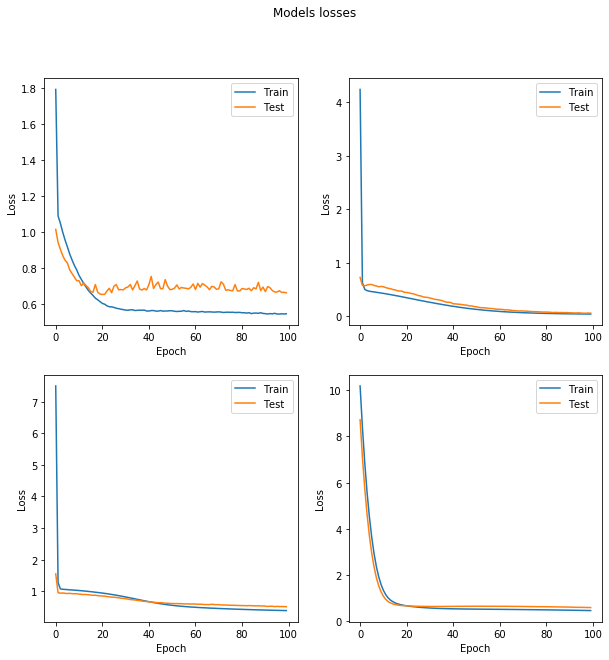

In [52]:
fig, axs=plt.subplots(2,2, figsize=(10,10))

count=0

for i in range(2):
    for j in range(2):
        axs[i][j].plot(histories[count].history['loss'])
        axs[i][j].plot(histories[count].history['val_loss'])
        axs[i][j].set_ylabel("Loss")
        axs[i][j].set_xlabel("Epoch")
        axs[i][j].legend(['Train', 'Test'], loc='best')
        count+=1


fig.suptitle('Models losses')

plt.show()

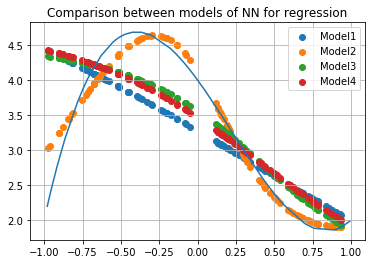

In [56]:
x_predicted = np.random.uniform(-1, 1, 100)
i=1

for model in models:
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,label="Model"+str(i))
    i+=1

plt.plot(x_valid, y_target)
plt.title("Comparison between models of NN for regression")
plt.legend()
plt.grid(True)
plt.show()

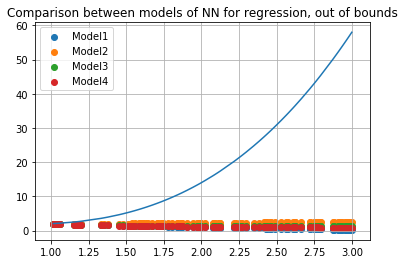

In [58]:
x_out= np.random.uniform(1, 3, 100)
x_out.sort()
y_out =a0+a1 * x_out + a2*x_out**2+a3*x_out**3
i=1

for model in models:
    y_predicted = model.predict(x_out)
    plt.scatter(x_out, y_predicted,label="Model"+str(i))
    i+=1

plt.plot(x_out, y_out)
plt.title("Comparison between models of NN for regression, out of bounds")
plt.legend()
plt.grid(True)
plt.show()